# Python for Data 27: Linear Regression
[back to index](https://www.kaggle.com/hamelg/python-for-data-analysis-index)

In the last few lessons we learned about statistical inference techniques including the t-test, chi-squared test and ANOVA which let you analyze differences between data samples. Predictive modeling--using a data samples to make predictions about unseen data, such as data that has yet to be generated--is another common data analytics task. Predictive modeling is a form of machine learning, which describes using computers to automate the process of finding patterns in data.

Machine learning is the driving force behind all kinds of modern conveniences and automation systems like ATMs that can read handwritten text, smartphones that translate speech to text and self-driving cars. The methods used in such cutting-edge applications are more advanced than anything we'll cover in this introduction, but they are all based on the principles of taking data and applying some learning algorithm to it to arrive at some sort of prediction.

This lesson is intended to provide a high level overview of linear regression and how to begin using it in Python.

# Linear Regression Basics


Linear regression is a predictive modeling technique for predicting a numeric response variable based on one or more explanatory variables. The term "regression" in predictive modeling generally refers to any modeling task that involves predicting a real number (as opposed classification, which involves predicting a category or class.). The term "linear" in the name linear regression refers to the fact that the method models data with linear combination of the explanatory variables. A linear combination is an expression where one or more variables are scaled by a constant factor and added together. In the case of linear regression with a single explanatory variable, the linear combination used in linear regression can be expressed as:

response = intercept + constant ∗ explanatory

The right side if the equation defines a line with a certain y-intercept and slope times the explanatory variable. In other words, linear regression in its most basic form fits a straight line to the response variable. The model is designed to fit a line that minimizes the squared differences (also called errors or residuals.). We won't go into all the math behind how the model actually minimizes the squared errors, but the end result is a line intended to give the "best fit" to the data. Since linear regression fits data with a line, it is most effective in cases where the response and explanatory variable have a linear relationship.

Let's revisit the mtcars data set and use linear regression to predict vehicle gas mileage based on vehicle weight. First, let's load some libraries and look at a scatterplot of weight and mpg to get a sense of the shape of the data:

In [30]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

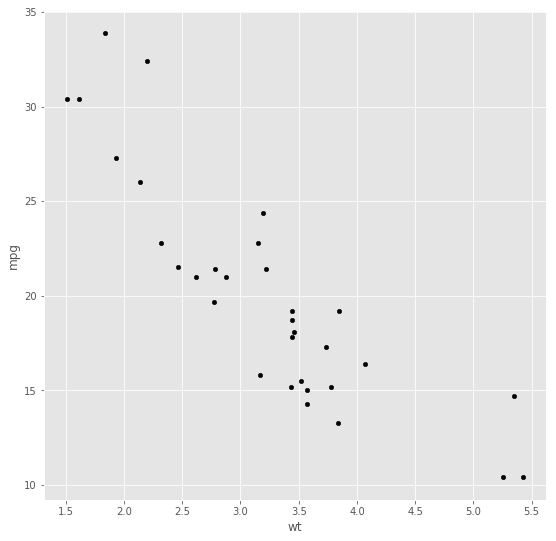

In [5]:
# Load mtcars data set
mtcars = pd.read_csv("../input/mtcars/mtcars.csv")

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black");

The scatterplot shows a roughly linear relationship between weight and mpg, suggesting a linear regression model might work well.

Python's scikit-learn library contains a wide range of functions for predictive modeling. Let's load its linear regression training function and fit a line to the mtcars data:

In [6]:
from sklearn import linear_model

In [7]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(mtcars["wt"]), 
                     y = mtcars["mpg"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

37.28512616734204
[-5.34447157]


The output above shows the model intercept and coefficients used to create the best fit line. In this case the y-intercept term is set to 37.2851 and the coefficient for the weight variable is -5.3445. In other words, the model fit the line: mpg = 37.2851 - 5.3445 * wt.

We can get a sense of how much of the variance in the response variable is explained by the model using the model.score() function:

In [8]:
regression_model.score(X = pd.DataFrame(mtcars["wt"]), 
                       y = mtcars["mpg"])

0.7528327936582646

The output of the score function for linear regression is "R-squared", a value that ranges from 0 to 1 which describes the proportion of variance in the response variable that is explained by the model. In this case, car weight explains roughly 75% of the variance in mpg.

The R-squared measure is based on the residuals: differences between what the model predicts for each data point and the actual value of each data point. We can extract the model's residuals by making a prediction with the model on the data and then subtracting the actual value from each prediction:

In [9]:
train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))

# Actual - prediction = residuals
residuals = mtcars["mpg"] - train_prediction

residuals.describe()

count    3.200000e+01
mean    -8.326673e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

R-squared is calculated as 1 - (SSResiduals/SSTotal) were SSResiduals is the sum of the squares of the model residuals and SSTotal is the sum of the squares of the difference between each data point and the mean of the data. We could calculate R-squared by hand like this:

In [10]:
SSResiduals = (residuals**2).sum()

SSTotal = ((mtcars["mpg"] - mtcars["mpg"].mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)

0.7528327936582646

Now that we have a linear model, let's plot the line it fits on our scatterplot to get a sense of how well it fits the data:

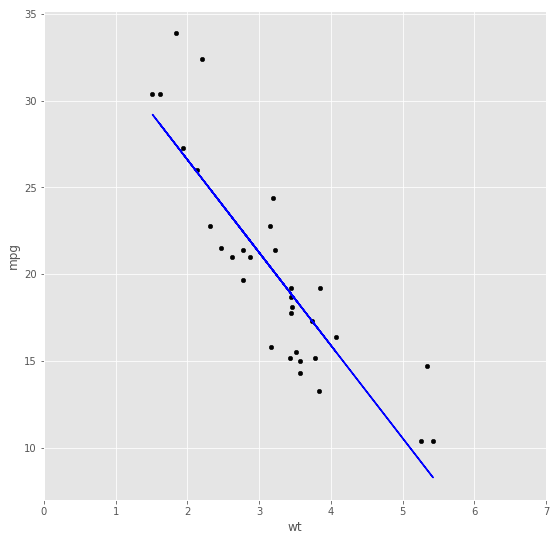

In [11]:

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot regression line
plt.plot(mtcars["wt"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue");

The regression line looks like a reasonable fit and it follows our intuition: as car weight increases we would expect fuel economy to decline.

Outliers can have a large influence on linear regression models: since regression deals with minimizing squared residuals, large residuals have a disproportionately large influence on the model. Plotting the result helps us detect influential outliers. In this case there does not appear to be any influential outliers. Let's add an outlier--a super heavy fuel efficient car--and plot a new regression model:

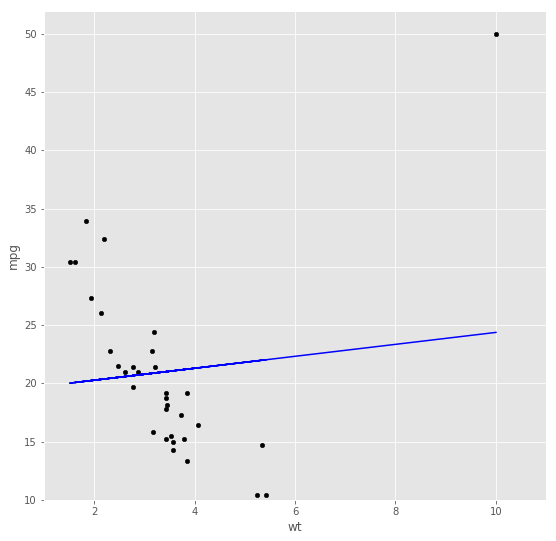

In [12]:
mtcars_subset = mtcars[["mpg","wt"]]

super_car = pd.DataFrame({"mpg":50,"wt":10}, index=["super"])

new_cars = mtcars_subset.append(super_car)

# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the new_cars data
regression_model.fit(X = pd.DataFrame(new_cars["wt"]), 
                     y = new_cars["mpg"])

train_prediction2 = regression_model.predict(X = pd.DataFrame(new_cars["wt"]))

# Plot the new model
new_cars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black", xlim=(1,11), ylim=(10,52))

# Plot regression line
plt.plot(new_cars["wt"],     # Explanatory variable
         train_prediction2,  # Predicted values
         color="blue");

Although this is an extreme, contrived case, the plot above illustrates how much influence a single outlier can have on a linear regression model.

In a well-behaved linear regression model, we'd like the residuals to be roughly normally distributed. That is, we'd like a roughly even spread of error above and below the regression line. We can investigate the normality of residuals with a Q-Q (quantile-quantile) plot. Make a qqplot by passing the residuals to the stats.probplot() function in the scipy.stats library:

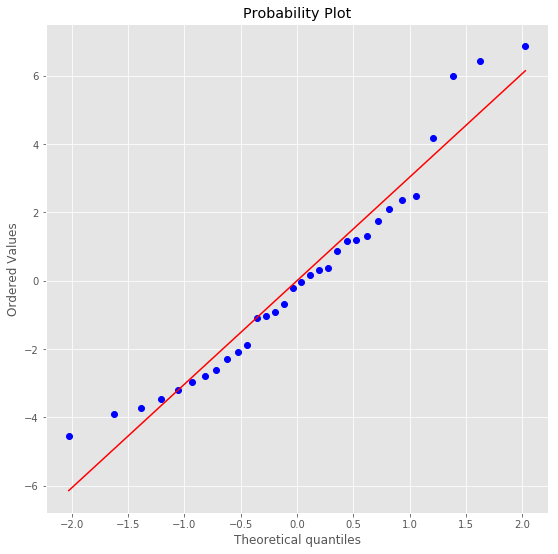

In [13]:
plt.figure(figsize=(9,9))

stats.probplot(residuals, dist="norm", plot=plt);

When residuals are normally distributed, they tend to lie along the straight line on the Q-Q plot. In this case residuals appear to follow a slightly non-linear pattern: the residuals are bowed a bit away from the normality line on each end. This is an indication that simple straight line might not be sufficient to fully describe the relationship between weight and mpg.

After making model predictions, it is useful to have some sort of metric to evaluate oh well the model performed. Adjusted R-squared is one useful measure, but it only applies to the regression model itself: we'd like some universal evaluation metric that lets us compare the performance of different types of models. Root mean squared error (RMSE) is a common evaluation metric for predictions involving real numbers. Root mean squared error is square root of the average of the squared error (residuals.). If you recall, we wrote a function to calculate RMSE way back in lesson lesson 12:

In [14]:
def rmse(predicted, targets):
    """
    Computes root mean squared error of two numpy ndarrays
    
    Args:
        predicted: an ndarray of predictions
        targets: an ndarray of target values
    
    Returns:
        The root mean squared error as a float
    """
    return (np.sqrt(np.mean((targets-predicted)**2)))

rmse(train_prediction, mtcars["mpg"])

2.949162685955028

Instead of defining your own RMSE function, you can use the scikit-learn library's mean squared error function and take the square root of the result:

In [15]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction, mtcars["mpg"])**0.5

RMSE

2.949162685955028

# Polynomial Regression

Variables often exhibit non-linear relationships that can't be fit well with a straight line. In these cases, we can use linear regression to fit a curved line the data by adding extra higher order terms (squared, cubic, etc.) to the model. A linear regression that involves higher order terms is known as "polynomial regression."

In [19]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([mtcars["wt"],           # Include weight
                           mtcars["wt"]**2]).T     # Include weight squared

# Train the model using the new_cars data
poly_model.fit(X = predictors, 
               y = mtcars["mpg"])

# Check trained model y-intercept
print("Model intercept")
print(poly_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients")
print(poly_model.coef_)

# Check R-squared
print("Model Accuracy:")
print(poly_model.score(X = predictors, 
                 y = mtcars["mpg"]))

Model intercept
49.93081094945181
Model Coefficients
[-13.38033708   1.17108689]
Model Accuracy:
0.8190613581384095


The output shows us that including the weight squared term appears to improve the model's performance because the R-squared increased from 0.75 to 0.8190. It should be noted, however, that adding more variables to a linear regression model can never cause R-squared to decrease, so we only want to add variables if there is a substantial improvement in performance.

Let's plot the curved line defined by the new model to see if the fit looks better than the old one. To start off, let's create a function that takes an array of x values, model coefficients and an intercept term and returns the x values and fitted y values corresponding to those x values.

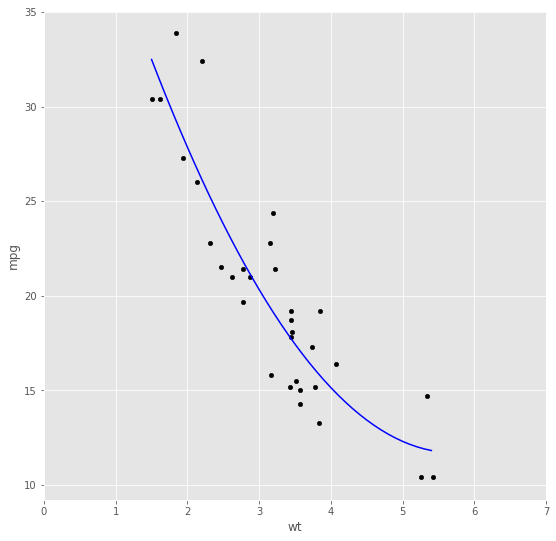

In [20]:
# Plot the curve from 1.5 to 5.5
poly_line_range = np.arange(1.5, 5.5, 0.1)

# Get first and second order predictors from range
poly_predictors = pd.DataFrame([poly_line_range,
                               poly_line_range**2]).T

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot curve line
plt.plot(poly_line_range,   # X-axis range
         y_values,          # Predicted values
         color="blue");

The quadratic function seems to fit the data a little better than the linear one. Let's investigate further by using the new model to make predictions on the original data and check the root mean squared error:

In [21]:
preds = poly_model.predict(X=predictors)

rmse(preds , mtcars["mpg"])

2.5233004724610786

Since the RMSE of the quadratic model is lower than the old one and the adjusted R-squared is higher, it is probably a better model. We do, however, have to be careful about overfitting the training data.

Overfitting describes a situation where our model fits the data we use to create it (training data) too closely, resulting in poor generalization to new data. This is why we generally don't want to use training data to evaluate a model: it gives us a biased, usually overly optimistic evaluation. One of the strengths of first and second order linear regression is that they are so simple, they are unlikely to overfit data very much. The more complex the model we create and the more freedom it has to fit the training data, the greater risk we run of overfitting. For example, we could keep including more polynomial terms in our regression model to fit the training data more closely and achieve lower RMSE scores against the training set, but this would almost certainly not generalize well to new data. Let's illustrate this point by fitting a 10th order model to the mtcars data:

In [22]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([mtcars["wt"],           
                           mtcars["wt"]**2,
                           mtcars["wt"]**3,
                           mtcars["wt"]**4,
                           mtcars["wt"]**5,
                           mtcars["wt"]**6,
                           mtcars["wt"]**7,
                           mtcars["wt"]**8,
                           mtcars["wt"]**9,
                           mtcars["wt"]**10]).T     

# Train the model using the new_cars data
poly_model.fit(X = predictors, 
               y = mtcars["mpg"])

# Check trained model y-intercept
print("Model intercept")
print(poly_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients")
print(poly_model.coef_)

# Check R-squared
poly_model.score(X = predictors, 
                 y = mtcars["mpg"])

Model intercept
-14921.120647946558
Model Coefficients
[ 6.45813583e+04 -1.20086135e+05  1.26931932e+05 -8.46598480e+04
  3.73155209e+04 -1.10334758e+04  2.16590409e+03 -2.70730550e+02
  1.94974165e+01 -6.15515447e-01]


0.8702106585933677

Notice the R-squared score has increased substantially from our quadratic model. Let's plot the best fit line to investigate what the model is doing:

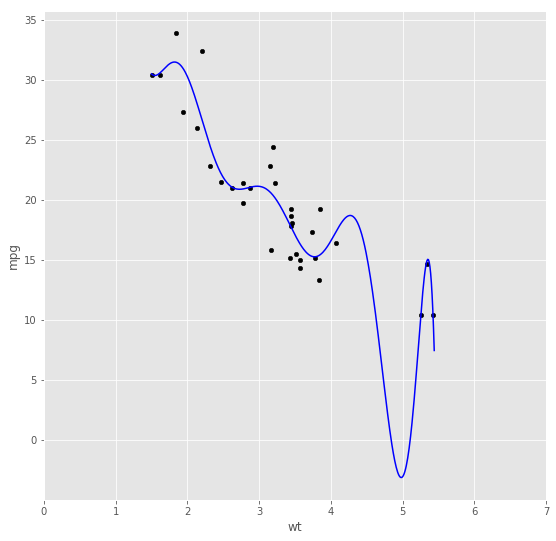

In [23]:
p_range = np.arange(1.5, 5.45, 0.01)

poly_predictors = pd.DataFrame([p_range, p_range**2, p_range**3,
                              p_range**4, p_range**5, p_range**6, p_range**7, 
                              p_range**8, p_range**9, p_range**10]).T  

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot curve line
plt.plot(p_range,   # X-axis range
         y_values,          # Predicted values
         color="blue");

Notice how the 10th order polynomial model curves wildly in some places to fit the training data. While this model happens to yield a closer fit to the training data, it will almost certainly fail to generalize well to new data as it leads to absurd predictions such as a car having less than 0 mpg if it weighs 5000lbs.

# Multiple Linear Regression

When faced with a predictive modeling task, you'll often have several variables in your data that may help explain variation in the response variable. You can include more explanatory variables in a linear regression model by including more columns in the data frame you pass to the model training function. Let's make a new model that adds the horsepower variable to our original model:

In [26]:
# Initialize model
multi_reg_model = linear_model.LinearRegression()

# Train the model using the mtcars data
multi_reg_model.fit(X = mtcars.loc[:,["wt","hp"]], 
                     y = mtcars["mpg"])

# Check trained model y-intercept
print(multi_reg_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print(multi_reg_model.coef_)

# Check R-squared
multi_reg_model.score(X = mtcars.loc[:,["wt","hp"]], 
                      y = mtcars["mpg"])

37.22727011644721
[-3.87783074 -0.03177295]


0.8267854518827914

The improved R-squared score suggests horsepower has a linear relationship with mpg. Let's investigate with a plot:

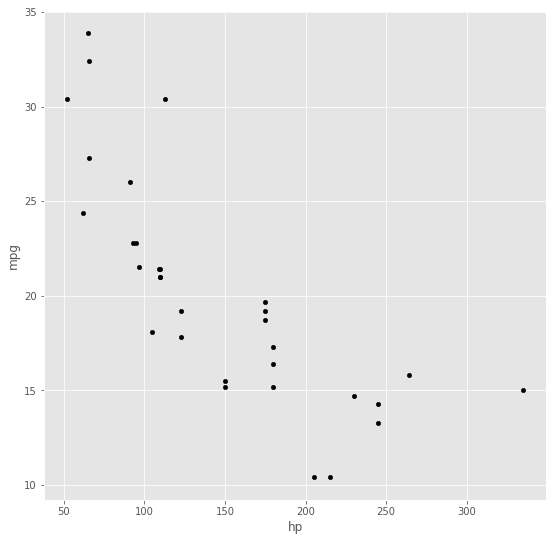

In [28]:
mtcars.plot(kind="scatter",
           x="hp",
           y="mpg",
           figsize=(9,9),
           color="black");

While mpg does tend to decline with horsepower, the relationship appears more curved than linear so adding polynomial terms to our multiple regression model could yield a better fit:

In [29]:
# Initialize model
multi_reg_model = linear_model.LinearRegression()

# Include squared terms
poly_predictors = pd.DataFrame([mtcars["wt"],
                                mtcars["hp"],
                                mtcars["wt"]**2,
                                mtcars["hp"]**2]).T

# Train the model using the mtcars data
multi_reg_model.fit(X = poly_predictors, 
                    y = mtcars["mpg"])

# Check R-squared
print("R-Squared")
print( multi_reg_model.score(X = poly_predictors , 
                      y = mtcars["mpg"]) )

# Check RMSE
print("RMSE")
print(rmse(multi_reg_model.predict(poly_predictors),mtcars["mpg"]))

R-Squared
0.8907279549670641
RMSE
1.9609108134176985


The new R-squared and lower RMSE suggest this is a better model than any we made previously and we wouldn't be too concerned about overfitting since it only includes 2 variables and 2 squared terms. Note that when working with multidimensional models, it becomes difficult to visualize results, so you rely heavily on numeric output.

We could continue adding more explanatory variables in an attempt to improve the model. Adding variables that have little relationship with the response or including variables that are too closely related to one another can hurt your results when using linear regression. You should also be wary of numeric variables that take on few unique values since they can act more like categorical variables than numeric ones.

# Wrap Up

Linear regression is one of the most common techniques for making real numbered predictions from data. It is a good place to start any time you need to make a numeric prediction. Next time we'll revisit the titanic survival data set and focus classification: assigning observations to categories.

# Next Lesson: [Python for Data 28: Logistic Regression](https://www.kaggle.com/hamelg/python-for-data-28-logistic-regression)
[back to index](https://www.kaggle.com/hamelg/python-for-data-analysis-index)